In [3]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torchvision
import torchvision.transforms as transforms

from net import Classifier, ConvClassifier
from net import AutoEncoder, ConvAutoEncoder
from dataloader import CustomCifar
from dataloader import CustomDataset


In [4]:
def imshow(img):
  img = torchvision.utils.make_grid(img)
  npimg = img.detach().numpy()
  plt.imshow(np.transpose(npimg, (1, 2, 0)))
  plt.show()


In [47]:
ae_model = 'conv_da_ae'
cls_model = 'conv_da_classification'


## Performance of the AutoEncoder model

In [49]:
model_path = f'./ckpt/ae/{ae_model}/model.pth'

transform = transforms.Compose([
    transforms.ToTensor(),
    # transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

cifar10 = CustomCifar()
cifar10.get_unbalanced_dataset(train_ratio=0.8)

trainset = CustomDataset(
    cifar10.train_data, cifar10.train_targets, transform=transform)

testset = torchvision.datasets.CIFAR10(
    root="./data", train=False, download=True, transform=transform)

trainloader = torch.utils.data.DataLoader(
    trainset, batch_size=56, shuffle=False, num_workers=2)

testloader = torch.utils.data.DataLoader(
    testset, batch_size=1, shuffle=False, num_workers=2, drop_last=True)

model = ConvAutoEncoder()
# model = AutoEncoder()

model.load_state_dict(torch.load(model_path))
model = model.eval()


num_imgs_dict {6: 5000, 9: 5000, 4: 5000, 1: 5000, 2: 5000, 7: 5000, 8: 5000, 3: 5000, 5: 5000, 0: 5000}
train_data (34000, 32, 32, 3)
valid_data (8500, 32, 32, 3)
Files already downloaded and verified


#### Against Training images

In [57]:
iteration = iter(trainloader)


Original Images


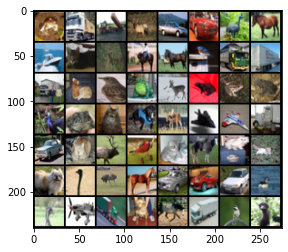

Reconstructured Images


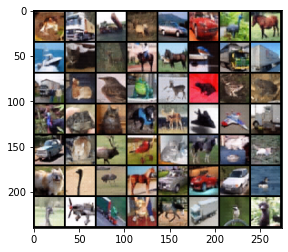

In [58]:
images, _ = next(iteration)

print('Original Images')
imshow(images)

print('Reconstructured Images')
embedding = model(images.float())
imshow(embedding)


#### Against Test Images

In [59]:
iteration = iter(testloader)

torch.Size([1, 3, 32, 32])


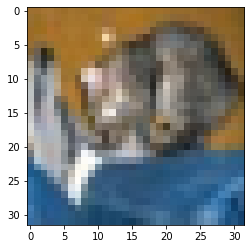

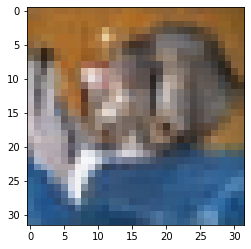

In [60]:
images, _ = next(iteration)
images = images.float()
print(images.shape)

imshow(images)


re_img = model(images)
re_img = re_img.reshape(-1, 3, 32, 32)
imshow(re_img)



## Inference of overall process

In [54]:
ae_model_path = f'./ckpt/ae/{ae_model}/model.pth'
cls_model_path = f'./ckpt/cls/{cls_model}/model.pth'

transform = transforms.Compose([
    transforms.ToTensor()
])

testset = torchvision.datasets.CIFAR10(
    root="./data", train=False, download=True, transform=transform)

testloader = torch.utils.data.DataLoader(
    testset, batch_size=1, shuffle=False, num_workers=2, drop_last=True)

ae = ConvAutoEncoder()
ae.load_state_dict(torch.load(ae_model_path))
ae.eval()

cls_net = ConvClassifier()
cls_net.load_state_dict(torch.load(cls_model_path))
cls_net.eval()



Files already downloaded and verified


ConvClassifier(
  (cls): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=8192, out_features=384, bias=True)
    (2): BatchNorm1d(384, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): ReLU()
    (4): Linear(in_features=384, out_features=150, bias=True)
    (5): BatchNorm1d(150, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU()
    (7): Linear(in_features=150, out_features=10, bias=True)
    (8): Softmax(dim=1)
  )
)

In [55]:
iteration = iter(testloader)

gt: cat


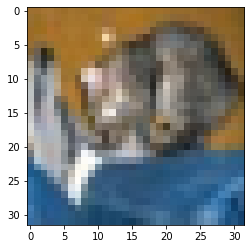

predict: cat


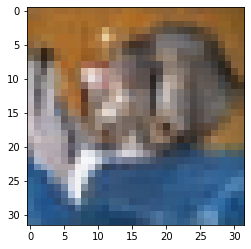

In [56]:
ae = ae.eval()
cls_net = cls_net.eval()

img, label = next(iteration)
img = img.float()
embed = ae.encoder(img)
re_img = ae(img)
pred = cls_net(embed)

print(f'gt: {testset.classes[label]}')
imshow(img)
print(f'predict: {testset.classes[np.argmax(pred.detach().numpy())]}')
imshow(re_img)
